# **Model**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_noscaled = pd.read_csv("data.csv")
df_scaled = df_noscaled.copy()

In [612]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          5764 non-null   int64  
 1   Toilets        5764 non-null   int64  
 2   Suites         5764 non-null   int64  
 3   Parking        5764 non-null   int64  
 4   Elevator       5764 non-null   int64  
 5   Furnished      5764 non-null   int64  
 6   Swimming Pool  5764 non-null   int64  
 7   New            5764 non-null   int64  
 8   Price_scaled   5764 non-null   float64
 9   Condo_scaled   5764 non-null   float64
 10  Size_scaled    5764 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 495.5 KB


## **Feature Engineering**

### Normalization

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
features = ["Price", "Condo", "Size"]

In [6]:
for feature in features:
    name = feature + '_scaled' 
    price_fit = scaler.fit(df_scaled[[feature]]) # Calcula o mínimo e o máximo a serem usados ​​para dimensionamento posterior
    df_scaled[name] = scaler.transform(df_scaled[[feature]]) # Dimensiona os recursos de X de acordo com feature_range

In [7]:
df_scaled[['Price', 'Price_scaled', 'Condo_scaled', 'Size_scaled']].describe()

,Price,Price_scaled,Condo_scaled,Size_scaled
count,5764.000000,5764.000000,5764.000000,5764.000000
mean,2276.121964,0.265306,0.092531,0.099679
std,1226.687781,0.221224,0.074382,0.087282
min,805.000000,0.000000,0.000000,0.000000
25%,1350.000000,0.098287,0.053067,0.045267
50%,1860.000000,0.190261,0.076667,0.072016
75%,2882.500000,0.374662,0.114167,0.123457
max,6350.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Price_scaled', ylabel='Density'>

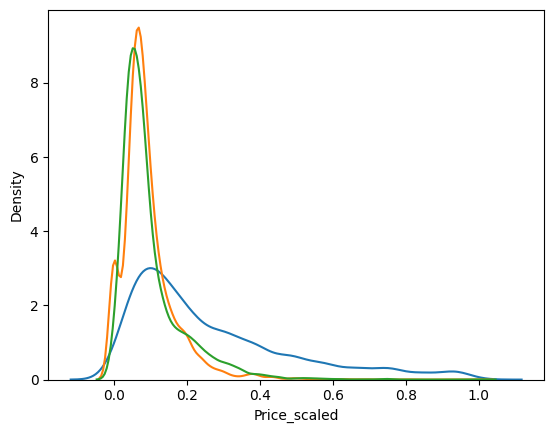

In [8]:
import seaborn as sns
sns.kdeplot(data=df_scaled, x="Price_scaled")
sns.kdeplot(data=df_scaled, x="Condo_scaled")
sns.kdeplot(data=df_scaled, x="Size_scaled")

In [9]:
df_scaled.drop(features, axis=1, inplace=True)

In [10]:
df_scaled

,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Price_scaled,Condo_scaled,Size_scaled
0,2,2,1,1,0,0,0,0,0.022543,0.029333,0.034979
1,2,2,1,1,0,0,0,0,0.035167,0.019733,0.030864
2,2,2,1,1,0,0,0,0,0.035167,0.013333,0.037037
3,2,2,1,1,0,0,0,0,0.035167,0.026667,0.037037
4,2,2,1,1,1,0,0,0,0.089270,0.054667,0.051440
...,...,...,...,...,...,...,...,...,...,...,...
5759,1,2,1,1,0,1,1,0,0.558161,0.113333,0.037037
5760,2,2,1,1,0,0,1,0,0.666366,0.100000,0.078189
5761,1,1,0,1,0,1,1,0,0.395852,0.081333,0.043210
5762,1,2,1,1,0,0,1,0,0.522092,0.079333,0.088477


## **Modelling**

### Linear Regression

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
y = df_scaled["Price_scaled"]
x = df_scaled.loc[: , df_scaled.columns != "Price_scaled"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(X_train, y_train) # ajusta o modelo usando o Mínimos Quadrados Ordinários (OLS)

LinearRegression()

In [16]:
predit = model.predict(X_train) # aplica a equação da regressão linear com os coeficientes ajustados

In [17]:
coef = model.coef_
intercept = model.intercept_
print("Intercepto:", intercept) # o intercepto é o valor estimado quando todas as variáveis independentes são zero (abstrato)
print("Coeficiente:", coef) # retorna o numero de vars independente usadas

Intercepto: 0.03190958456192708
Coeficiente: [-0.03710453  0.0430687  -0.01820008  0.03673764 -0.00308881  0.11766049
  0.06663665 -0.03771006  0.43267929  1.06862736]


#### 1. Mean-absolute-error

In [18]:
from sklearn.metrics import mean_absolute_error 

In [19]:
mae = mean_absolute_error(y_train, predit)

In [20]:
print(mae)

0.11286853904354115


#### 2. Cross-Validation: mae

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [22]:
scores_fold_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [23]:
scores_fold_mae = -scores_fold_mae

In [24]:
print(scores_fold_mae)
print(np.mean(scores_fold_mae))

[0.11516975 0.12057525 0.10335263 0.11151597 0.11706926]
0.11353657234972454


### Decision Tree 

In [600]:
y = df_noscaled["Price"]
x = df_noscaled.loc[: , df_noscaled.columns != "Price"]

In [601]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [602]:
from sklearn.tree import DecisionTreeRegressor

In [603]:
regressor = DecisionTreeRegressor(min_samples_leaf=30)

In [604]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=30)

In [605]:
y_predict = regressor.predict(X_train)
y_predict_test = regressor.predict(X_test)

In [606]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [607]:
mae_treino = mean_absolute_error(y_train, y_predict)
mse_treino = mean_squared_error(y_train, y_predict)
rmse_treino = np.sqrt(mse_treino)

In [608]:
mae_test = mean_absolute_error(y_test, y_predict_test)
mse_test = mean_squared_error(y_test, y_predict_test)
rmse_test = np.sqrt(mse_test)

In [609]:
print(f"Treino MAE: {mae_treino}")
print(f"Treino RMSE: {rmse_treino}")
print(f"Teste MAE: {mae_test}")
print(f"Teste RMSE: {rmse_test}")

Treino MAE: 552.177355951189
Treino RMSE: 769.1447439723387
Teste MAE: 580.4007875884715
Teste RMSE: 812.4974187311802


In [610]:
cross = cross_val_score(regressor,X_train,y_train, cv=5 , scoring='neg_mean_absolute_error' )
cross = -cross

In [611]:
print(cross)
print(np.mean(cross))

[591.27729981 609.60922738 558.7547083  605.97037333 617.6126255 ]
596.6448468646188
